# <center>Customer Categorizing With KNN</center>

In [1]:
# import required libraries

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set_style(style='whitegrid')

# About the dataset

A telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. 

It is a classification problem. That is, given the dataset,  with predefined labels, we will build a model to be used to predict class of a new or unknown case. 

This dataset focuses on demographic data, such as region, age, and marital, to predict usage patterns. The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:

- Basic Service
<br>
- E-Service
<br> 
- Plus Service
<br>
- Total Service

We will use a specific type of classification called K nearest neighbour.

In [10]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-01-18 12:13:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

teleCust1000t.csv   100%[===================>]  36.18K  --.-KB/s    in 0.1s    

2020-01-18 12:13:50 (362 KB/s) - 'teleCust1000t.csv' saved [37048/37048]



In [3]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualization and Analysis

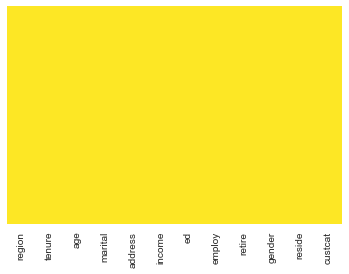

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis_r', cbar=False)

So, this dataset has no null values to be fixed

Now, lets check the correlation of variables

/Users/finneysunny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 10 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


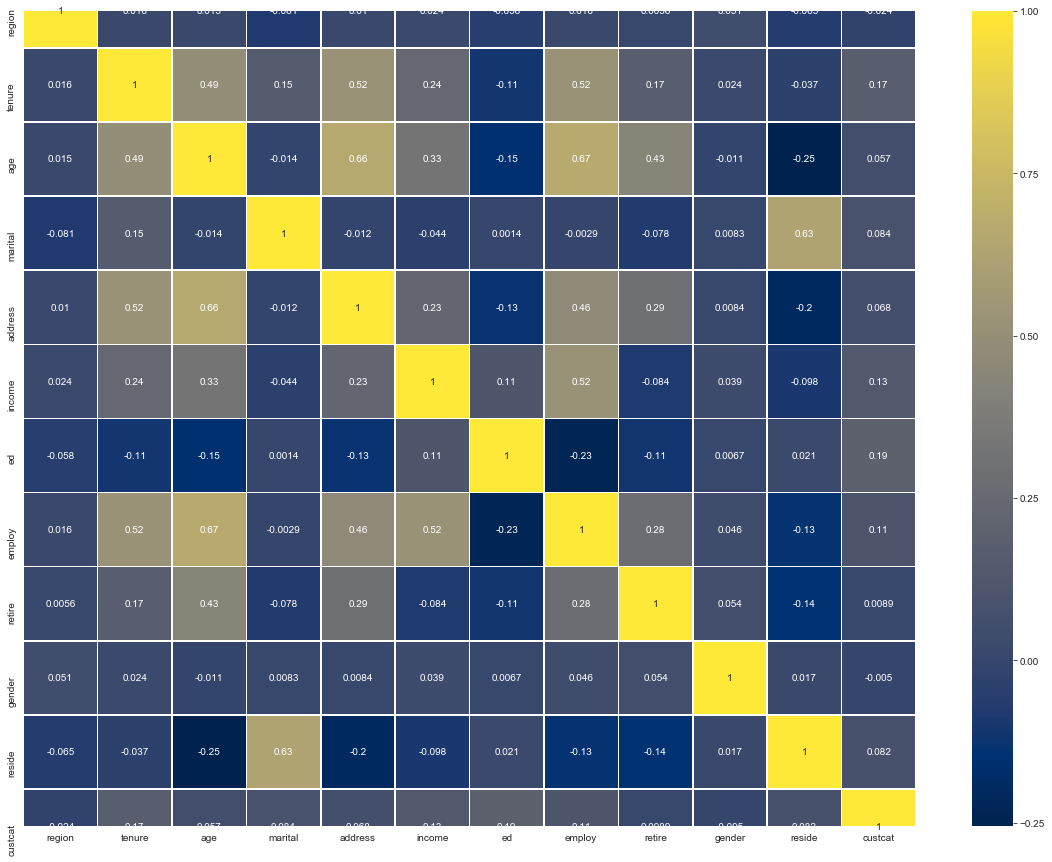

In [22]:
plt.figure(figsize=(20,15))
axes = plt.axes()
axes.set_ylim(10, 10)
sns.heatmap(df.corr(), cmap='cividis', annot=True,linewidths= 0.5)

In [23]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


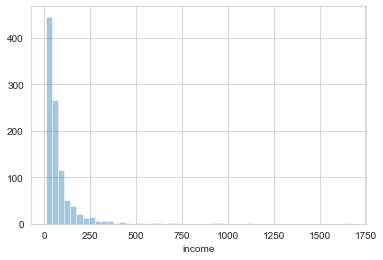

In [30]:
sns.distplot(df["income"], bins=50, hist=True, kde=False)

# Feature set

In [31]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
x[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.]])

In [32]:
y= df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

In [33]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (700, 11) (700,)
Test set:  (300, 11) (300,)


# KNN Classification

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [58]:
acc_score = []
for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    yhat = knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test, yhat))

In [59]:
acc = pd.DataFrame(acc_score)
acc

,0
0,0.280000
1,0.273333
2,0.306667
3,0.330000
4,0.340000
5,0.316667
6,0.340000
7,0.316667
8,0.326667
9,0.336667


Text(0, 0.5, 'Accuracy')

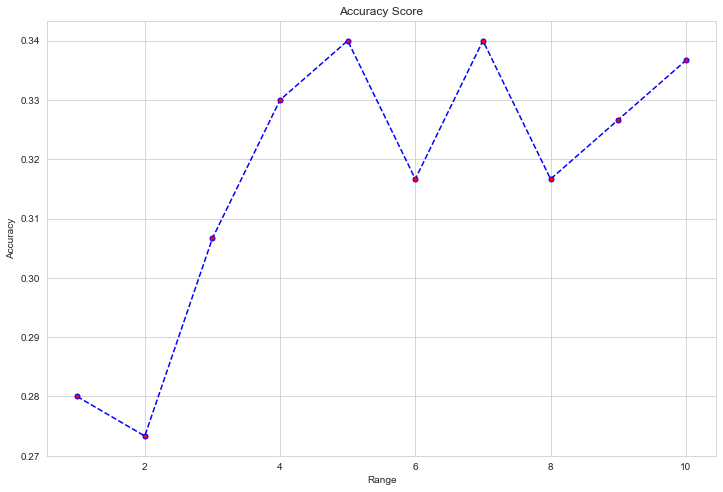

In [61]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11), acc_score, linestyle='--', color='blue', marker='o', mfc='red', ms=5)
plt.title("Accuracy Score")
plt.xlabel("Range")
plt.ylabel("Accuracy")

# Model Development

In [62]:
k = 7
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat1 = knn.predict(X_test)
yhat1

array([3, 3, 4, 2, 4, 3, 3, 4, 3, 4, 1, 4, 3, 2, 2, 1, 4, 4, 3, 1, 3, 2,
       1, 4, 1, 3, 1, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 1, 2, 4, 3, 4, 3, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 1, 2, 2, 4, 3, 1, 4, 1, 4, 2, 1, 3, 3,
       1, 2, 2, 1, 3, 3, 4, 3, 1, 1, 4, 1, 4, 3, 3, 1, 2, 4, 4, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 4, 3, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 1, 1, 2, 1, 3, 2, 3, 4, 3, 2, 3, 1, 2, 4, 3, 3, 3, 2, 1,
       1, 4, 3, 2, 4, 1, 1, 2, 1, 3, 4, 3, 1, 2, 1, 1, 2, 2, 1, 4, 4, 2,
       2, 3, 3, 3, 3, 4, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 2, 4, 4, 2, 4, 2,
       1, 4, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 4, 4, 3, 1, 4, 3, 3, 4, 1, 3,
       2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 4, 2, 1, 1, 2, 3, 3, 3, 2, 3, 1, 1,
       4, 3, 1, 2, 1, 3, 1, 4, 4, 1, 2, 2, 1, 1, 2, 2, 1, 2, 4, 4, 3, 4,
       4, 1, 2, 3, 4, 1, 2, 2, 4, 1, 4, 2, 4, 1, 1, 2, 4, 2, 2, 1, 2, 2,
       2, 3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 4, 3, 3, 1, 2, 4, 4, 4, 1, 2,
       4, 3, 3, 1, 1, 1, 4, 1, 3, 3, 4, 1, 1, 3])

In [63]:
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat1))

Test set accuracy:  0.34
